## 01_Data Exploration 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates
import datetime
import calendar

In [2]:
raw_merged = pd.read_csv('zillow_raw.csv')
raw_merged.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


#### Date time variables

In [3]:
raw_merged['transactiondate']=pd.to_datetime(raw_merged['transactiondate'])
raw_merged['month'] = raw_merged['transactiondate'].dt.month
raw_merged['year'] = raw_merged['transactiondate'].dt.year
raw_merged['month_abbr'] = raw_merged['month'].apply(lambda x: calendar.month_abbr[x])
raw_merged.drop('transactiondate', axis=1, inplace=True)

#Finding average monthly error
avg_monthly_error = raw_merged.groupby(raw_merged['month'])['logerror'].mean().reset_index()


### Target Variable Exploration

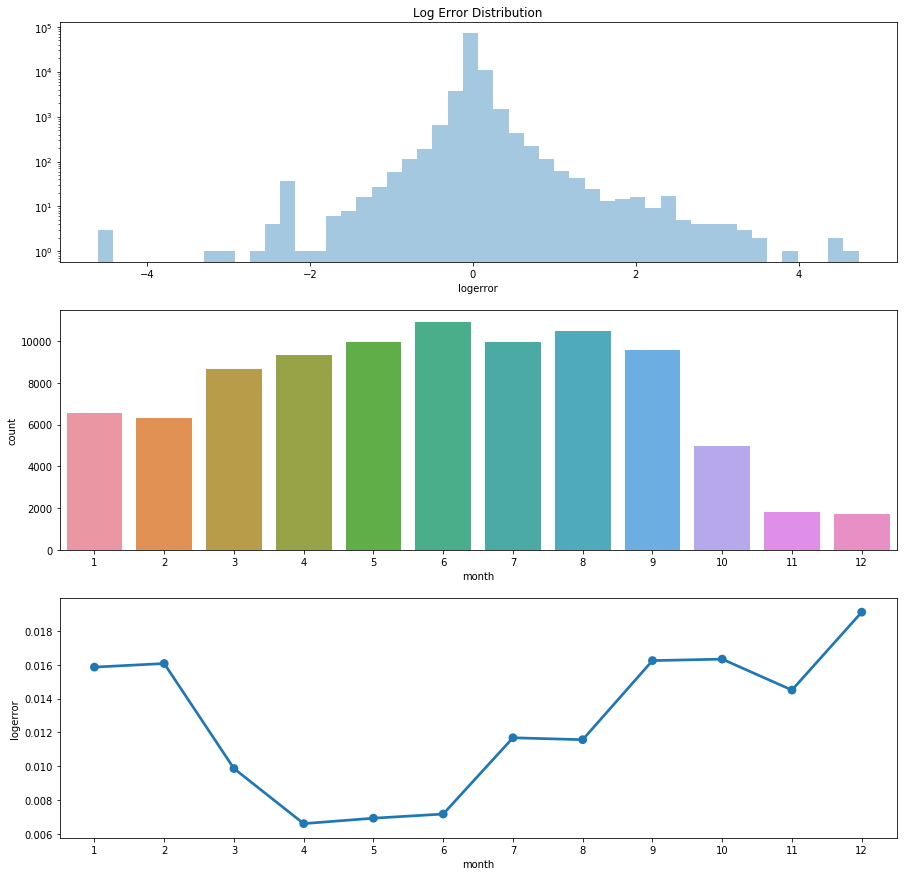

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15,15),nrows=3)

#First plot
sns.distplot(raw_merged['logerror'], kde=False, bins=50, ax=ax1)
ax1.set_yscale('log')
ax1.set_title('Log Error Distribution')

#Second plot
sns.countplot(x='month', data=raw_merged, ax=ax2)


#Third plot
sns.pointplot(x='month',y='logerror', data=avg_monthly_error)

### Checking for multiple sales

In [5]:
multiple_sales = pd.concat(g for _, g in raw_merged.groupby('parcelid') if len(g)>1)

In [6]:
multiple_sales.shape

(249, 62)

In [7]:
single_sales = pd.concat(g for _, g in raw_merged.groupby('parcelid') if len(g)==1)

In [8]:
assert len(raw_merged)== len(multiple_sales) + len(single_sales)

In [9]:
multiple_sales.head()

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,month,year,month_abbr
10828,10736972,-0.0460,1.0,NaN,NaN,4.0,6.0,NaN,4.0,4.0,...,352441.0,2015.0,74031.0,4415.55,NaN,NaN,6.037800e+13,2,2016,Feb
10829,10736972,-0.0367,1.0,NaN,NaN,4.0,6.0,NaN,4.0,4.0,...,352441.0,2015.0,74031.0,4415.55,NaN,NaN,6.037800e+13,12,2016,Dec
9177,10790468,-0.0450,NaN,NaN,NaN,2.0,3.0,NaN,7.0,2.0,...,417874.0,2015.0,278369.0,5314.55,NaN,NaN,6.037135e+13,2,2016,Feb
9178,10790468,-0.0440,NaN,NaN,NaN,2.0,3.0,NaN,7.0,2.0,...,417874.0,2015.0,278369.0,5314.55,NaN,NaN,6.037135e+13,9,2016,Sep
2226,10796614,-0.1267,1.0,NaN,NaN,3.0,4.0,NaN,7.0,3.0,...,90319.0,2015.0,38735.0,1196.48,NaN,NaN,6.037139e+13,1,2016,Jan


### Checking Missing Observations

In [10]:
missing = raw_merged.isnull().mean().sort_values(ascending=False).reset_index()
missing.columns =  ['variable', 'percent']
missing.head()

,variable,percent
0,buildingclasstypeid,0.999823
1,finishedsquarefeet13,0.999634
2,storytypeid,0.999524
3,basementsqft,0.999524
4,yardbuildingsqft26,0.998948


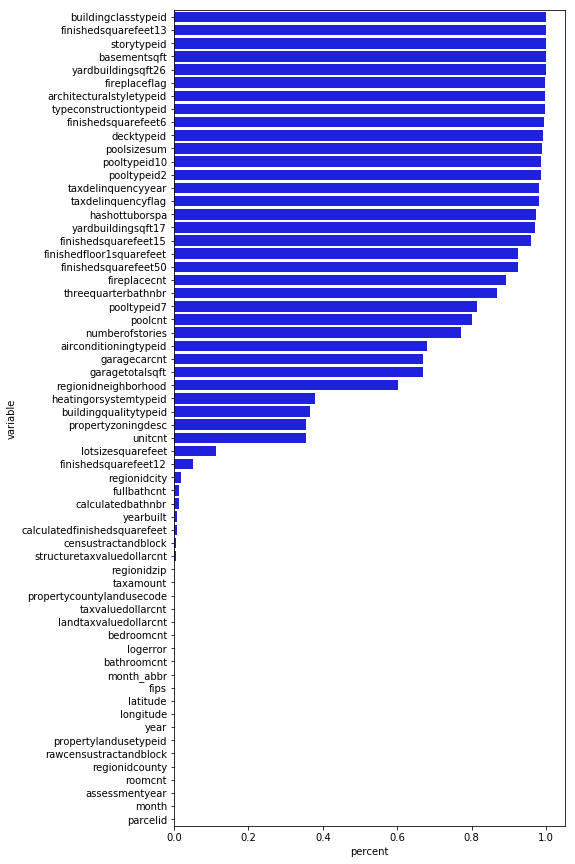

In [11]:
fig, ax = plt.subplots(figsize = (7,15))
sns.barplot(x= 'percent', y='variable', data=missing, color='b')

### Multicolinearity

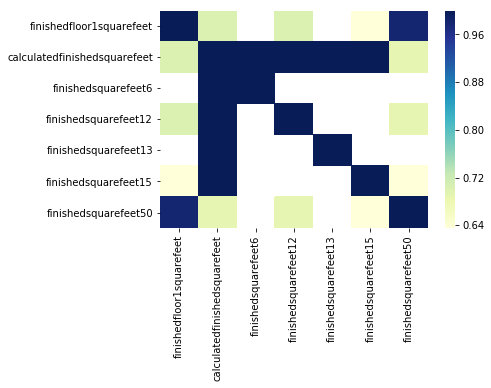

In [12]:
# Grouping similar columns

# 1) Square Feet
sqft_cols = ['finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet6', 
             'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50' ]

corr_sqft = raw_merged[sqft_cols].corr()
sns.heatmap(corr_sqft, cmap="YlGnBu")
